<a href="https://colab.research.google.com/github/anaisaoviedo-upb/Validacion-cruzada/blob/main/Validaci%C3%B3n_Cruzada_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Validación Cruzada

**Validación cruzada en regresión:** varias métricas y tiempo de ejecución

cv=10

cross_validate(model, X, Y, cv=cv, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'), return_train_score=True)

*Nota*: las métricas deben multiplicarse por -1 porque scikit-learn asume que "más grande es mejor"


**Validación cruzada en clasficación:** muestreo estratificado

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cross_validate(model, X, Y, cv=cv, scoring=('f1', 'accuracy','precision', 'recall'), return_train_score=True)


In [ ]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparación de Datos


In [ ]:
#Cargamos los datos
data = pd.read_excel("Covid_Antioquia.xlsx",sheet_name=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158453 entries, 0 to 158452
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Edad                        158453 non-null  int64 
 1   Sexo                        158453 non-null  object
 2   Estado                      158453 non-null  object
 3   inicioSintomas_diagnostico  158453 non-null  int64 
 4   Pertenencia étnica          158453 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.0+ MB


In [ ]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158453 entries, 0 to 158452
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Edad                        158453 non-null  int64 
 1   Sexo                        158453 non-null  object
 2   Estado                      158453 non-null  object
 3   inicioSintomas_diagnostico  158453 non-null  int64 
 4   Pertenencia étnica          158453 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.0+ MB


In [ ]:
#Corrección de tipos de datos
data['Sexo']=data['Sexo'].astype('category')
data['Estado']=data['Estado'].astype('category')
data['Pertenencia étnica']=data['Pertenencia étnica'].astype('category')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158453 entries, 0 to 158452
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Edad                        158453 non-null  int64   
 1   Sexo                        158453 non-null  category
 2   Estado                      158453 non-null  category
 3   inicioSintomas_diagnostico  158453 non-null  int64   
 4   Pertenencia étnica          158453 non-null  category
dtypes: category(3), int64(2)
memory usage: 2.9 MB


In [ ]:
#Descripción de variables numéricas
data.describe()

,Edad,inicioSintomas_diagnostico
count,158453.000000,158453.000000
mean,38.912043,9.916701
std,16.962558,5.308300
min,0.000000,0.000000
25%,27.000000,5.000000
50%,36.000000,11.000000
75%,50.000000,15.000000
max,108.000000,20.000000


<Axes: >

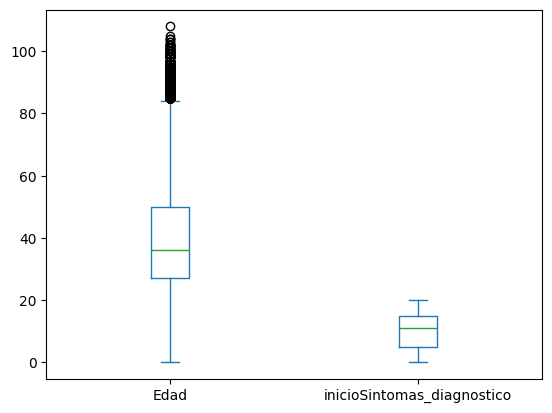

In [ ]:
data.plot(kind='box')

<Axes: xlabel='Sexo'>

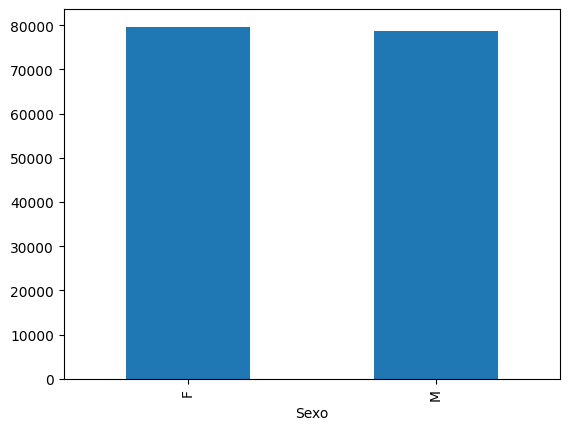

In [ ]:
#Descripción variables categóricas
data['Sexo'].value_counts().plot(kind='bar')

<Axes: xlabel='Pertenencia étnica'>

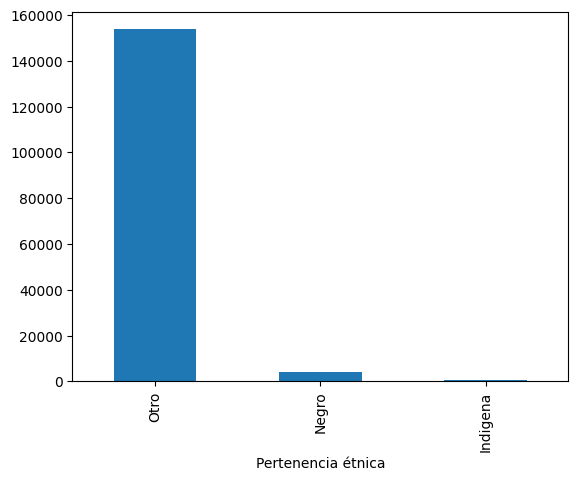

In [ ]:
data['Pertenencia étnica'].value_counts().plot(kind='bar')


<Axes: xlabel='Estado'>

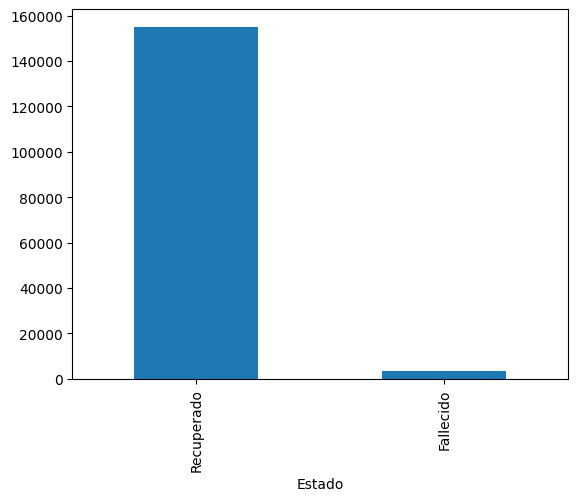

In [ ]:
data['Estado'].value_counts().plot(kind='bar')

In [ ]:
#Balanceo de datos
#from imblearn.over_sampling import SMOTENC, SMOTE

#Balanceo para variables predictoras con al menos una categoría
#sm = SMOTENC(categorical_features=[1,3]) #se indican las variables categoricas

#Balanceo para variables predictoras numéricas
#sm = SMOTE()

#X, Y = sm.fit_resample(X,Y) #Se almacenan el resultado en las mismas variables
#Y.value_counts().plot(kind='bar')

In [ ]:
#Dummies para las variables predictoras
data = pd.get_dummies(data, columns=['Pertenencia étnica'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['Sexo'], drop_first=True, dtype=int)

data.head()

,Edad,Estado,inicioSintomas_diagnostico,Pertenencia étnica_Indigena,Pertenencia étnica_Negro,Pertenencia étnica_Otro,Sexo_M
0,50,Recuperado,9,0,0,1,0
1,55,Recuperado,5,0,0,1,1
2,25,Recuperado,3,0,0,1,1
3,27,Recuperado,5,0,0,1,0
4,26,Recuperado,5,0,0,1,0


In [ ]:
#LabelEncoder para la variable objetivo
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Estado'] =labelencoder.fit_transform(data['Estado'])

data

,Edad,Estado,inicioSintomas_diagnostico,Pertenencia étnica_Indigena,Pertenencia étnica_Negro,Pertenencia étnica_Otro,Sexo_M
0,50,1,9,0,0,1,0
1,55,1,5,0,0,1,1
2,25,1,3,0,0,1,1
3,27,1,5,0,0,1,0
4,26,1,5,0,0,1,0
...,...,...,...,...,...,...,...
158448,45,1,13,0,0,1,0
158449,35,1,13,0,0,1,1
158450,61,1,13,0,0,1,1
158451,41,1,13,0,0,1,1


# 2. Validación Cruzada







In [ ]:
#Validación Cruzada
from sklearn.model_selection import cross_validate, StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()
scoring=('f1', 'accuracy','precision', 'recall')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) #Muestreo estratificado

In [ ]:
#Se separa variables predictoras y objetivo
X = data.drop("Estado", axis = 1)
Y = data['Estado']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158453 entries, 0 to 158452
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Edad                         158453 non-null  int64
 1   inicioSintomas_diagnostico   158453 non-null  int64
 2   Pertenencia étnica_Indigena  158453 non-null  int64
 3   Pertenencia étnica_Negro     158453 non-null  int64
 4   Pertenencia étnica_Otro      158453 non-null  int64
 5   Sexo_M                       158453 non-null  int64
dtypes: int64(6)
memory usage: 7.3 MB


# TREE

In [ ]:
#Método de ML a usar en la validación cruzada
from sklearn import tree
modelTree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=200, max_depth=None)

scores = cross_validate(modelTree, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.216627,0.019122,0.989501,0.989472,0.979238,0.979181,0.979778,0.979790,0.999420,0.999348
1,0.209381,0.025276,0.989404,0.989457,0.979048,0.979152,0.979834,0.979850,0.999162,0.999255
2,0.185420,0.023957,0.989497,0.989422,0.979238,0.979089,0.980202,0.980125,0.998969,0.998897
3,0.284067,0.026246,0.989500,0.989473,0.979236,0.979181,0.979899,0.979776,0.999291,0.999363
4,0.279272,0.026297,0.989211,0.989454,0.978668,0.979153,0.979766,0.980174,0.998840,0.998911
5,0.281958,0.023259,0.988954,0.989482,0.978163,0.979209,0.979634,0.980188,0.998453,0.998954
6,0.277157,0.024987,0.989306,0.989436,0.978858,0.979118,0.979952,0.980133,0.998840,0.998918
7,0.308743,0.023062,0.989532,0.989469,0.979299,0.979174,0.979900,0.979776,0.999355,0.999355
8,0.286056,0.025113,0.989312,0.989493,0.978858,0.979223,0.979346,0.979838,0.999484,0.999341
9,0.229343,0.017769,0.989628,0.989458,0.979489,0.979153,0.979965,0.979769,0.999484,0.999341


In [ ]:
# Promedios
scores.mean()


,0
fit_time,0.255802
score_time,0.023509
test_f1,0.989385
train_f1,0.989462
test_accuracy,0.979010
train_accuracy,0.979163
test_precision,0.979828
train_precision,0.979942
test_recall,0.999130
train_recall,0.999168


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_f1']
print(comparacion_CV)

       Tree
0  0.989501
1  0.989404
2  0.989497
3  0.989500
4  0.989211
5  0.988954
6  0.989306
7  0.989532
8  0.989312
9  0.989628


In [ ]:
#Modelo final Tree
modelTree.fit(X, Y) #100%

# KNN

In [ ]:
#Validación cruzada con Knn

# Normalizar las variables numéricas

In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
var_num=['Edad','inicioSintomas_diagnostico']
min_max_scaler.fit(X[var_num]) #Ajuste de los parametros: max - min
X[var_num]= min_max_scaler.transform(X[var_num]) #70%
X.head()

,Edad,inicioSintomas_diagnostico,Pertenencia étnica_Indigena,Pertenencia étnica_Negro,Pertenencia étnica_Otro,Sexo_M
0,0.462963,0.45,0,0,1,0
1,0.509259,0.25,0,0,1,1
2,0.231481,0.15,0,0,1,1
3,0.250000,0.25,0,0,1,0
4,0.240741,0.25,0,0,1,0


In [ ]:
#Validación Cruzada

#Método Perezoso
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')


scores = cross_validate(model_knn, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores



,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.217909,3.621302,0.981951,0.983757,0.964723,0.968241,0.983698,0.985167,0.980210,0.982352
1,0.241815,3.797631,0.981742,0.983738,0.964281,0.968199,0.982566,0.985027,0.980919,0.982452
2,0.202919,3.413988,0.981403,0.984127,0.963650,0.968964,0.983117,0.985499,0.979694,0.982760
3,0.219365,3.448074,0.981452,0.984284,0.963711,0.969258,0.982244,0.985259,0.980661,0.983311
4,0.260878,3.851051,0.983204,0.984937,0.967119,0.970514,0.983426,0.985174,0.982982,0.984701
5,0.199125,3.309564,0.982319,0.984850,0.965415,0.970352,0.983334,0.985387,0.981306,0.984314
6,0.328395,4.204461,0.981108,0.983292,0.963080,0.967344,0.983044,0.985077,0.979179,0.981514
7,0.301476,4.251729,0.980008,0.982075,0.960997,0.965030,0.983635,0.985664,0.976407,0.978513
8,0.195566,3.403927,0.981200,0.983708,0.963269,0.968157,0.983360,0.985508,0.979050,0.981915
9,0.202170,3.442721,0.983557,0.985476,0.967750,0.971544,0.981946,0.984891,0.985174,0.986062


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_f1']
print(comparacion_CV)

       Tree       Knn
0  0.989501  0.981951
1  0.989404  0.981742
2  0.989497  0.981403
3  0.989500  0.981452
4  0.989211  0.983204
5  0.988954  0.982319
6  0.989306  0.981108
7  0.989532  0.980008
8  0.989312  0.981200
9  0.989628  0.983557


# NN

In [ ]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Red neuronal
from sklearn.neural_network import MLPClassifier
model_rn = MLPClassifier(activation="relu",hidden_layer_sizes=(16), learning_rate='constant',
                     learning_rate_init=0.02, momentum= 0.3, max_iter=500, verbose=False)


scores = cross_validate(model_rn, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores



,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,4.159998,0.023384,0.989381,0.989406,0.978985,0.979033,0.978985,0.979033,1.0,1.0
1,5.222639,0.060940,0.989381,0.989406,0.978985,0.979033,0.978985,0.979033,1.0,1.0
2,5.629828,0.029105,0.989381,0.989406,0.978985,0.979033,0.978985,0.979033,1.0,1.0
3,4.462623,0.021293,0.989413,0.989402,0.979047,0.979026,0.979047,0.979026,1.0,1.0
4,8.153630,0.022816,0.989413,0.989402,0.979047,0.979026,0.979047,0.979026,1.0,1.0
5,4.078315,0.021826,0.989413,0.989402,0.979047,0.979026,0.979047,0.979026,1.0,1.0
6,6.085887,0.025083,0.989413,0.989402,0.979047,0.979026,0.979047,0.979026,1.0,1.0
7,3.722093,0.021805,0.989413,0.989402,0.979047,0.979026,0.979047,0.979026,1.0,1.0
8,7.003057,0.027613,0.989413,0.989402,0.979047,0.979026,0.979047,0.979026,1.0,1.0
9,4.878885,0.021685,0.989413,0.989402,0.979047,0.979026,0.979047,0.979026,1.0,1.0


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Nn']=scores['test_f1']
print(comparacion_CV)

       Tree       Knn        Nn
0  0.989501  0.981951  0.989381
1  0.989404  0.981742  0.989381
2  0.989497  0.981403  0.989381
3  0.989500  0.981452  0.989413
4  0.989211  0.983204  0.989413
5  0.988954  0.982319  0.989413
6  0.989306  0.981108  0.989413
7  0.989532  0.980008  0.989413
8  0.989312  0.981200  0.989413
9  0.989628  0.983557  0.989413


<Axes: >

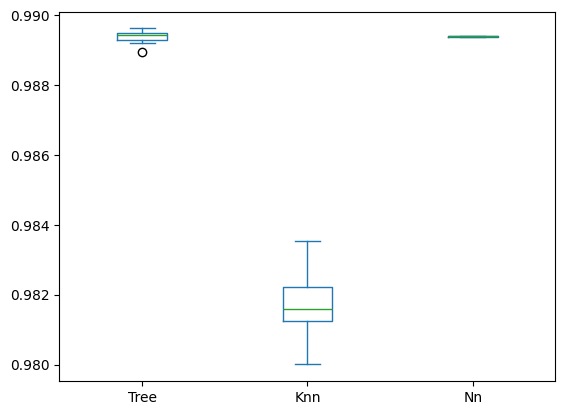

In [ ]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box')

# 3. Hipótesis

H₀ (nula): No hay diferencia significativa en el desempeño (test_f1) entre los modelos.

H₁ (alternativa): Al menos un modelo tiene un desempeño significativamente diferente.

Se puede usar:
* ANOVA + Tukey
* Friedman + Nemenyi

Nota: Si no existe diferencia estadística significativa se selecciona el modelo por complejidad computacional.

In [ ]:
comparacion_CV

,Tree,Knn,Nn
0,0.989501,0.981951,0.989381
1,0.989404,0.981742,0.989381
2,0.989497,0.981403,0.989381
3,0.989500,0.981452,0.989413
4,0.989211,0.983204,0.989413
5,0.988954,0.982319,0.989413
6,0.989306,0.981108,0.989413
7,0.989532,0.980008,0.989413
8,0.989312,0.981200,0.989413
9,0.989628,0.983557,0.989413


# 4. Modelo final con todos los datos

In [ ]:
#Tree
modelTree.fit(X, Y) #100%

DecisionTreeClassifier(min_samples_leaf=200)

[Text(0.7978253182461104, 0.9722222222222222, 'Edad <= 0.644\ngini = 0.041\nsamples = 158453\nvalue = [3323, 155130]\nclass = Recuperado'),
 Text(0.6568246110325319, 0.9166666666666666, 'Edad <= 0.569\ngini = 0.018\nsamples = 149480\nvalue = [1334, 148146]\nclass = Recuperado'),
 Text(0.7273249646393212, 0.9444444444444444, 'True  '),
 Text(0.5045968882602546, 0.8611111111111112, 'Edad <= 0.468\ngini = 0.01\nsamples = 141687\nvalue = [734, 140953]\nclass = Recuperado'),
 Text(0.32973833097595473, 0.8055555555555556, 'Edad <= 0.384\ngini = 0.005\nsamples = 120512\nvalue = [276, 120236]\nclass = Recuperado'),
 Text(0.19103606789250355, 0.75, 'Edad <= 0.301\ngini = 0.003\nsamples = 98861\nvalue = [129, 98732]\nclass = Recuperado'),
 Text(0.1166018387553041, 0.6944444444444444, 'inicioSintomas_diagnostico <= 0.675\ngini = 0.001\nsamples = 64936\nvalue = [43, 64893]\nclass = Recuperado'),
 Text(0.06913012729844413, 0.6388888888888888, 'inicioSintomas_diagnostico <= 0.375\ngini = 0.002\nsamp

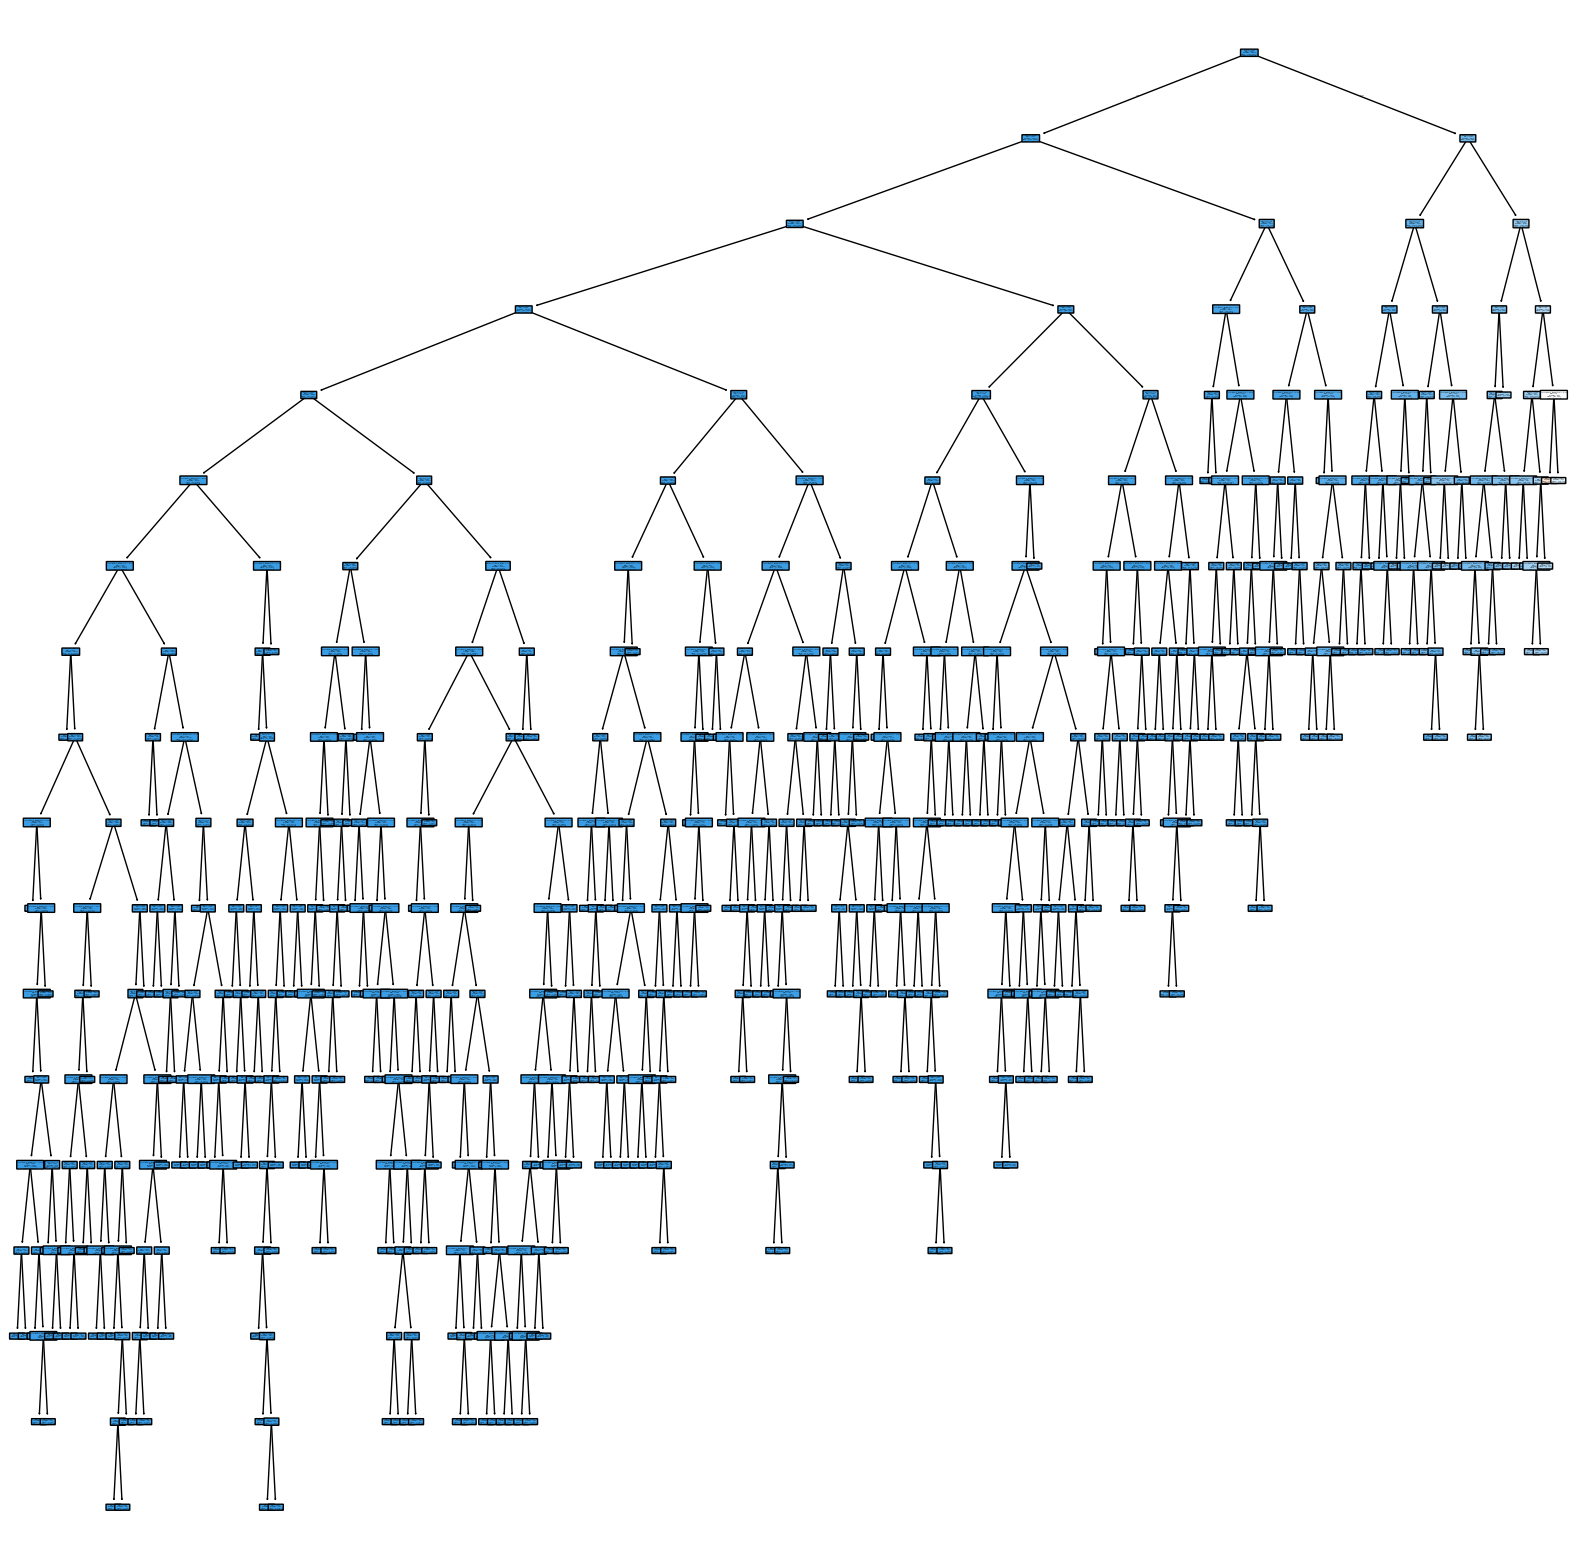

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(modelTree, feature_names=X.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)

In [ ]:

#Knn
model_knn.fit(X, Y) #100%


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [ ]:

#NN
model_rn.fit(X, Y) #100%

MLPClassifier(hidden_layer_sizes=16, learning_rate_init=0.02, max_iter=500,
              momentum=0.3)

# 4. Guardamos el modelo

In [ ]:
import pickle
filename = 'modeloCV.pkl'
variables=X.columns._values
pickle.dump([modelTree,model_knn,model_rn,labelencoder,variables,min_max_scaler], open(filename, 'wb'))